## Applied machine learning

## Week 1 , simple classification task

In [1]:
%matplotlib notebook

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits=pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

Creating a dictionary for the apples and other fruits and labels as well 

In [5]:
lookup_fruit_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Creating a Train-Test split

In [6]:
x=fruits[['mass','width','height','color_score']]
y=fruits['fruit_label']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

## checking the shape of the test

In [7]:
x_train.shape

(44, 4)

In [8]:
x_test.shape

(15, 4)

## Visual inspection of the data input and the test

<IPython.core.display.Javascript object>


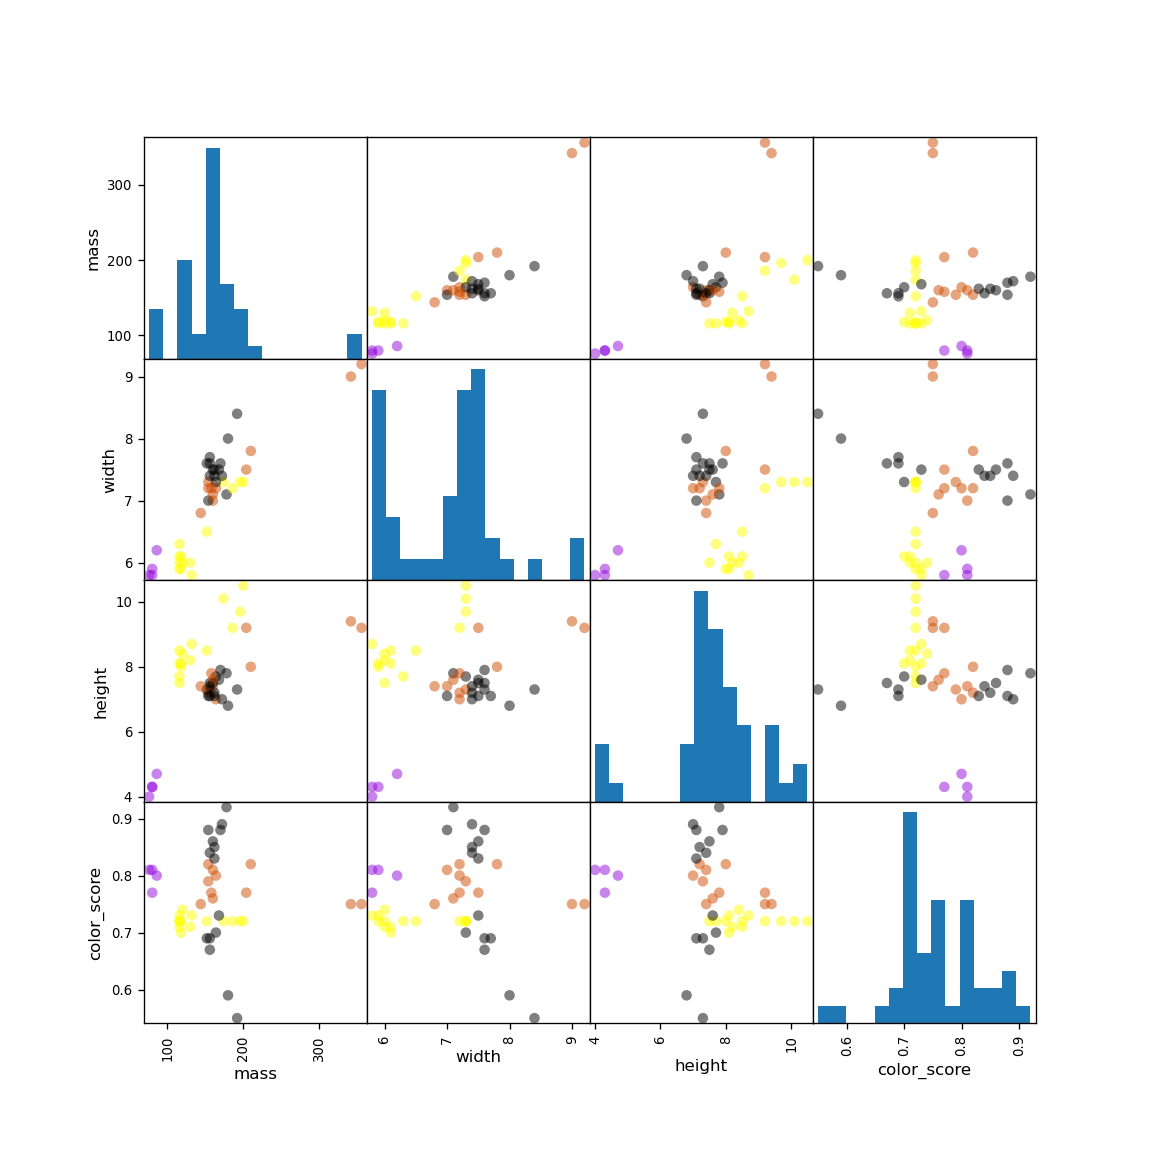

In [9]:
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(x_train,c=y_train,marker='o',s=40,hist_kwds={'bins':15},figsize=(8,8),cmap=cmap)

## Creating a 3 dimensional plot 

<IPython.core.display.Javascript object>


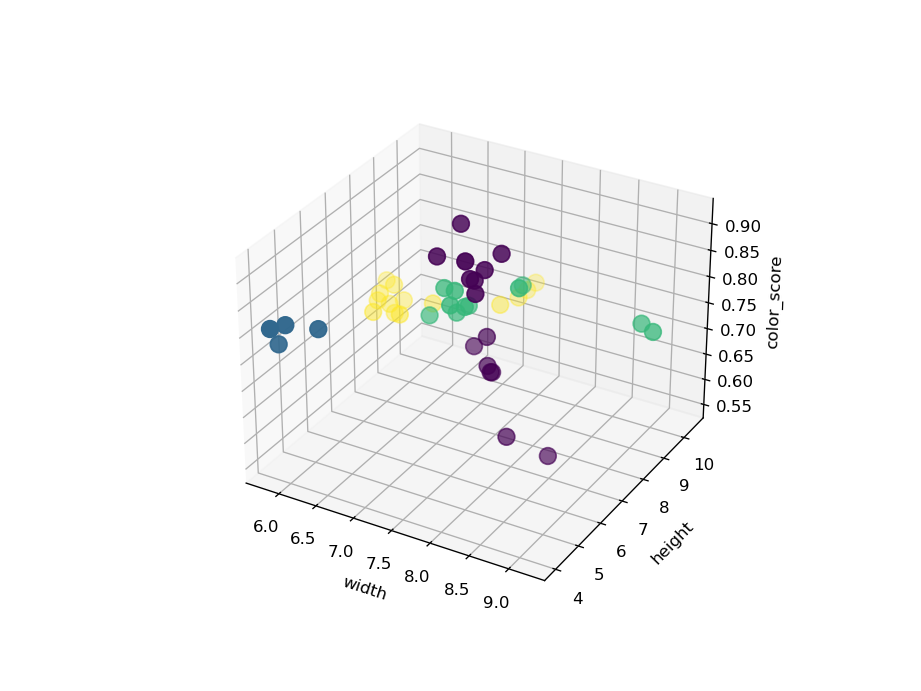

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x_train['width'],x_train['height'],x_train['color_score'],c=y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## creating a train-test split for classification

In [12]:
x=fruits[['mass','width','height']]
y=fruits['fruit_label']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

## Create classifier object

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#specifiying the number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

## Train the classifier, fit the estimator using the training data 

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

## Estimate the accuracy of the classifier on the fitdata using the test data 

In [15]:
knn.score(x_test,y_test)

0.5333333333333333

## Use the new KNN model to classify a new unseen objects

In [16]:
fruit_prediction= knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [17]:
fruit_prediction= knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

## Plot the decision boundarires of KNN classifier

In [18]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(x_train,y_train,5,'uniform')

ModuleNotFoundError: No module named 'adspy_shared_utilities'

## second plotting method

<IPython.core.display.Javascript object>


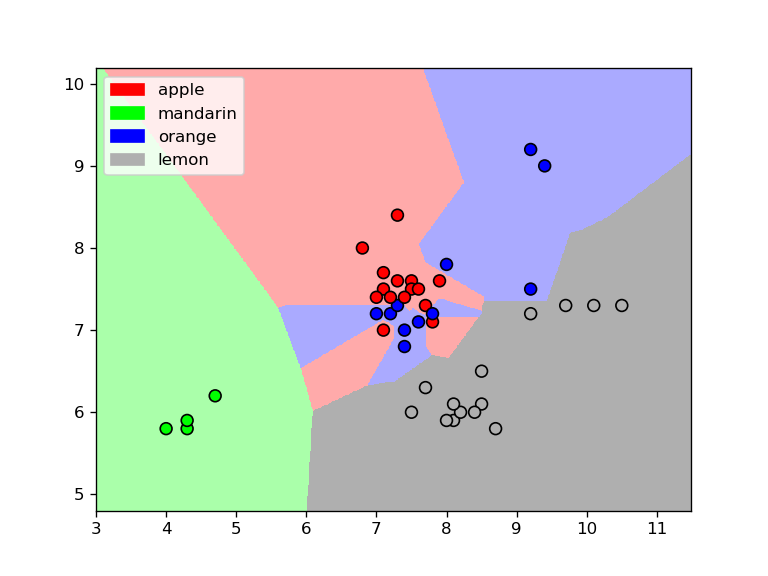

C:\Users\omar.elfarouk\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [23]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
n_neighbors=1
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plt.show()
plot_fruit_knn(X_train, y_train, 1, 'uniform')